# Generation with Vanilla Parzen Windows

In [1]:
from sklearn import datasets
import numpy as np

centers = [(-1, -1), (1, 1)]
X, y = datasets.make_blobs(n_samples=100, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

print('Data = Gaussian Isotropic blobs in 2D(clusters).')
print('X: %d data points in %dD.' % X.shape)
print('y: cluster of each data point.')

Data = Gaussian Isotropic blobs in 2D(clusters).
X: 100 data points in 2D.
y: cluster of each data point.


In [43]:
import matplotlib.pyplot as plt
import pylab
import scipy.stats as st
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

def blob_plot(ax, x, y, title, **params):
    ax.scatter(x, y, **params)
    ax.set_title(title)
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
def kde_plot(ax, x1b, x2b, xx, yy, f, title, **params):
    ax.set_xlim(x1b[0], x1b[1])
    ax.set_ylim(x2b[0], x2b[1])
    cfset = ax.contourf(xx, yy, f, cmap='Blues')
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Grid search to find optimal bandwidth.
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.001, 10.0, 1000)},
                    cv=20)
grid.fit(X)
print(grid.best_params_)

{'bandwidth': 0.4914414414414415}


In [37]:
xmins = X.min(axis=0)
xmaxs = X.max(axis=0)

x1b = (xmins[0], xmaxs[0])
x2b = (xmins[1], xmaxs[1])

# bandwidth = 0.1
bandwidth = 0.5
# KDE using Scipy.
kernel_sc = st.gaussian_kde(X.T, bw_method=0.25)

# KDE using Sklearn.
kernel_sk = KernelDensity(bandwidth=bandwidth).fit(X)

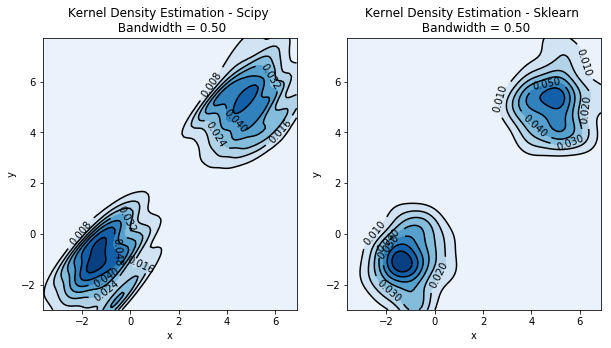

In [38]:
# Grid of points to plot the 2D distribution.
xx, yy = np.mgrid[x1b[0]:x1b[1]:100j, x2b[0]:x2b[1]:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
# Estimate the grid of points using the density estimations.
f_sc = np.reshape(kernel_sc(positions).T, xx.shape)
f_sk = np.reshape(np.exp(kernel_sk.score_samples(positions.T)), xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
kde_plot(ax[0], x1b, x2b, xx, yy, f_sc, 'Kernel Density Estimation - Scipy \n Bandwidth = {:0.2f}'.format(bandwidth))
kde_plot(ax[1], x1b, x2b, xx, yy, f_sk, 'Kernel Density Estimation - Sklearn \n Bandwidth = {:0.2f}'.format(bandwidth))

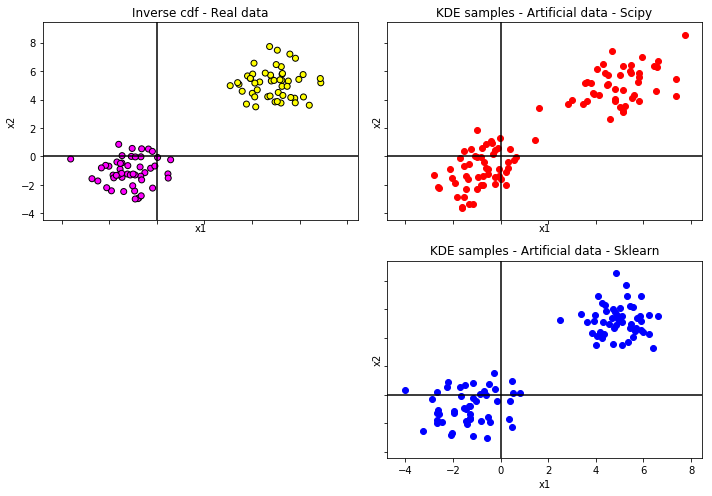

In [40]:
X_artif_sc = kernel_sc.resample(100)
X_artif_sk = kernel_sk.sample(100)

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
blob_plot(ax[0, 0], X[:, 0], X[:, 1], title='Inverse cdf - Real data', \
            c=y, cmap=pylab.cm.spring, edgecolors='k')
blob_plot(ax[0, 1], X_artif_sc[0, :], X_artif_sc[1, :], title='KDE samples - Artificial data - Scipy', \
            c='r')
blob_plot(ax[1, 1], X_artif_sk[:, 0], X_artif_sk[:, 1], title='KDE samples - Artificial data - Sklearn', \
            c='b')
ax[1, 0].axis('off')
plt.tight_layout()

In [42]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [44]:
kernel = KernelDensity(bandwidth=bandwidth).fit(Xtr)

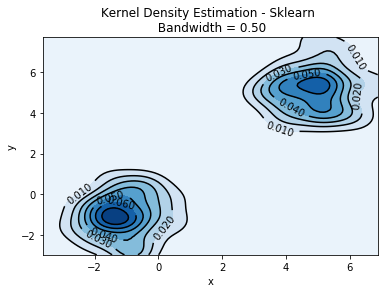

In [45]:
# Grid of points to plot the 2D distribution.
xx, yy = np.mgrid[x1b[0]:x1b[1]:100j, x2b[0]:x2b[1]:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
# Estimate the grid of points using the density estimations.
f = np.reshape(np.exp(kernel.score_samples(positions.T)), xx.shape)

fig, ax = plt.subplots()
kde_plot(ax, x1b, x2b, xx, yy, f_sk, 'Kernel Density Estimation - Sklearn \n Bandwidth = {:0.2f}'.format(bandwidth))

In [50]:
Xa = kernel.sample(100)

In [52]:
# Log likelihood.
print(kernel.score(Xte))
print(kernel.score(Xa))

-102.24039236262841
-355.0699318156036
